# Course:  Convolutional Neural Networks for Image Classification

## Section-1

<span style="font-size:14pt">**Quick Win #1: Convolution**</span>  
  
<span style="font-size:14pt">**Description:**</span>  
<span style="font-size:13pt">*Implement convolution operation to grayscale image*</span>  
<span style="font-size:13pt">*Detect edge of the object on image by different filters*</span>  
  
<span style="font-size:13pt">**File:** *convolution.ipynb*</span>

<span style="font-size:14pt">**Algorithm:**</span>  
  
<span style="font-size:13pt">**-->** Reading coloured images</span>  
<span style="font-size:13pt">**-->** Converting images to GRAY</span>  
<span style="font-size:13pt">**-->** Defining common filters for edge detection</span>  
<span style="font-size:13pt">**-->** Finding edges by convolution</span>  
  
<span style="font-size:13pt">**Result:**
Plot with input GRAY images and images with detected edges by different filters</span>

## Importing libraries

In [7]:
# Importing needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing library to see calculation progress inside loops in Real Time
# To install, use following command: pip install tqdm
# Don't forget to activate environment in which you're working
from tqdm import tqdm


## Opening images

In [8]:
# Reading PNG, JPG and BMP images by OpenCV library
# In this way images are opened already as Numpy arrays

# (!) OpenCV by default reads images in BGR format (order of channels)
# (!) On Windows, the path might look like following:
# r'images\cat.png'
# or:
# 'images\\cat.png'

image1_BGR = cv2.imread('images/cat.png')
image2_BGR = cv2.imread('images/horse.jpg')
image3_BGR = cv2.imread('images/tiger.bmp')


# Check point
# Showing type of loaded images
print('Type of image1_BGR is:', type(image1_BGR))
print('Type of image2_BGR is:', type(image2_BGR))
print('Type of image3_BGR is:', type(image3_BGR))


# Check point
# Showing shapes of loaded images
print()
print('Shape of image1_BGR is:', image1_BGR.shape)
print('Shape of image2_BGR is:', image2_BGR.shape)
print('Shape of image3_BGR is:', image3_BGR.shape)


Type of image1_BGR is: <class 'numpy.ndarray'>
Type of image2_BGR is: <class 'numpy.ndarray'>
Type of image3_BGR is: <class 'numpy.ndarray'>

Shape of image1_BGR is: (853, 1280, 3)
Shape of image2_BGR is: (426, 640, 3)
Shape of image3_BGR is: (1256, 1920, 3)


## Converting loaded images into Grayscale

In [9]:
# Converting images to GRAY by OpenCV function
image1_GRAY = cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2GRAY)
image2_GRAY = cv2.cvtColor(image2_BGR, cv2.COLOR_BGR2GRAY)
image3_GRAY = cv2.cvtColor(image3_BGR, cv2.COLOR_BGR2GRAY)


# Check point
# Showing shapes of GRAY images
print('Shape of image1_GRAY is:', image1_GRAY.shape)
print('Shape of image2_GRAY is:', image2_GRAY.shape)
print('Shape of image3_GRAY is:', image3_GRAY.shape)


# Converting images into GRAY by formula
# Y' = 0.299 R + 0.587 G + 0.114 B
image11_GRAY = image1_BGR[:, :, 2] * 0.299 + \
               image1_BGR[:, :, 1] * 0.587 + \
               image1_BGR[:, :, 0] * 0.114

image22_GRAY = image2_BGR[:, :, 2] * 0.299 + \
               image2_BGR[:, :, 1] * 0.587 + \
               image2_BGR[:, :, 0] * 0.114

image33_GRAY = image3_BGR[:, :, 2] * 0.299 + \
               image3_BGR[:, :, 1] * 0.587 + \
               image3_BGR[:, :, 0] * 0.114


# Check point
# Showing pixels' values after conversion by both ways
# Slicing only 10 numbers from first row
print()
print('Pixels of GRAY image converted by OpenCV:', image1_GRAY[0, :9])
print('Pixels of GRAY image converted by formula:', image11_GRAY[0, :9])
# Rounding float numbers
print('Pixels of GRAY image converted by formula:', 
      np.around(image11_GRAY[0, :9], decimals=0))
# Making float numbers as integers
print('Pixels of GRAY image converted by formula:',
      np.around(image11_GRAY[0, :9], decimals=0).astype(np.uint))


# Rounding float numbers and making them as integers for all images
image11_GRAY = np.around(image11_GRAY, decimals=0).astype(np.uint)
image22_GRAY = np.around(image22_GRAY, decimals=0).astype(np.uint)
image33_GRAY = np.around(image33_GRAY, decimals=0).astype(np.uint)


Shape of image1_GRAY is: (853, 1280)
Shape of image2_GRAY is: (426, 640)
Shape of image3_GRAY is: (1256, 1920)

Pixels of GRAY image converted by OpenCV: [25 25 25 24 24 24 24 24 24]
Pixels of GRAY image converted by formula: [24.967 24.967 24.967 23.967 23.967 23.967 23.967 23.967 23.967]
Pixels of GRAY image converted by formula: [25. 25. 25. 24. 24. 24. 24. 24. 24.]
Pixels of GRAY image converted by formula: [25 25 25 24 24 24 24 24 24]


## Plotting coloured and converted GRAY images

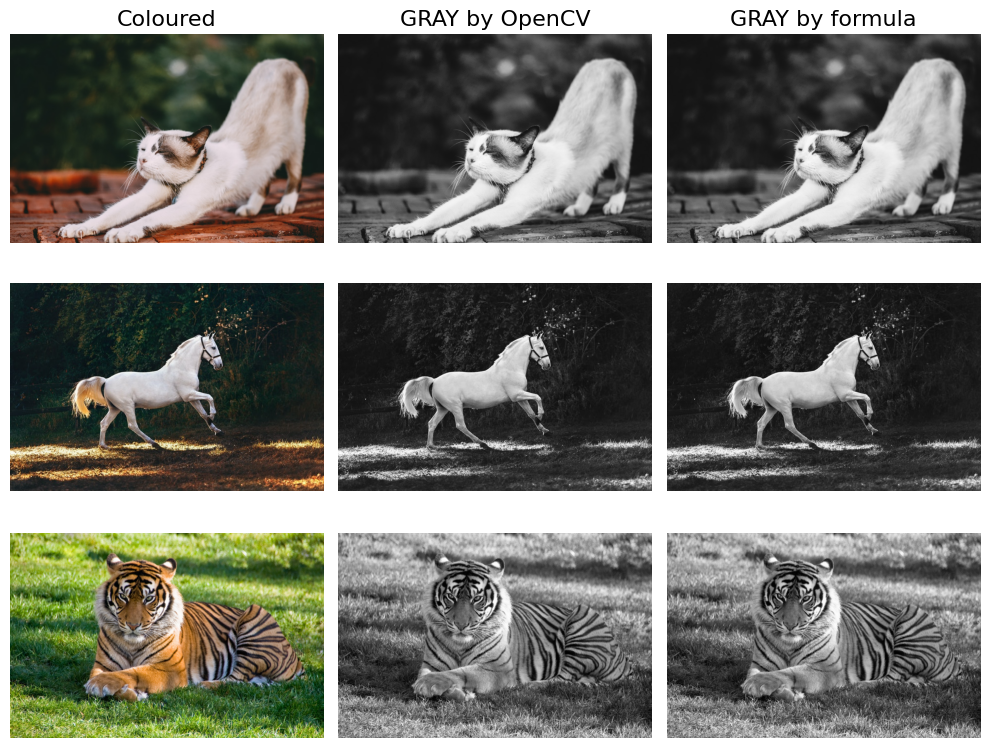

In [10]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=3, ncols=3)
# ax is a (3, 3) Numpy array and to access specific subplot we call it by ax[0, 0]


# Adjusting first column with coloured images
# Converting at the same time images from BGR to RGB
ax[0, 0].imshow(cv2.cvtColor(image1_BGR, cv2.COLOR_BGR2RGB))
ax[1, 0].imshow(cv2.cvtColor(image2_BGR, cv2.COLOR_BGR2RGB))
ax[2, 0].imshow(cv2.cvtColor(image3_BGR, cv2.COLOR_BGR2RGB))


# Adjusting second column with GRAY images converted by OpenCV
ax[0, 1].imshow(image1_GRAY, cmap=plt.get_cmap('gray'))
ax[1, 1].imshow(image2_GRAY, cmap=plt.get_cmap('gray'))
ax[2, 1].imshow(image3_GRAY, cmap=plt.get_cmap('gray'))


# Adjusting third column with GRAY images converted by formula
ax[0, 2].imshow(image11_GRAY, cmap=plt.get_cmap('gray'))
ax[1, 2].imshow(image22_GRAY, cmap=plt.get_cmap('gray'))
ax[2, 2].imshow(image33_GRAY, cmap=plt.get_cmap('gray'))


# Giving names to columns
ax[0, 0].set_title('Coloured', fontsize=16)
ax[0, 1].set_title('GRAY by OpenCV', fontsize=16)
ax[0, 2].set_title('GRAY by formula', fontsize=16)


# Hiding axes to all subplots
for i in range(3):
    for j in range(3):
        ax[i, j].axis('off')


# Adjusting distance between subplots
plt.tight_layout()


# Showing the plot
plt.show()


## Applying convolution to GRAY images by edge detection filters

### Setting hyperparameters and applying pad

In [11]:
# Preparing hyperparameters for convolution
# To get convolved image (output feature map) with the same dimension
# as input image, it is needed to set following:
# filter (kernel) size, f_size = 3 (width and height are equal)
# stride (step) for sliding, stride = 1
# pad to process boundaries (zero valued frame around image), pad = 1

# Output image's dimension is calculated by following equations:
# height_out = (height_in - f_size + 2 * pad) / step + 1
# width_out = (width_in - f_size + 2 * pad) / step + 1

# For instance, input GRAY image is 1280x720 of spatial size (width and height),
# then output image (convolved image, feature map) will be as following:
# height_out = (720 - 3 + 2 * 1) / 1 + 1 = 720
# width_out = (1280 - 3 + 2 * 1) / 1 + 1 = 1280


# Applying to GRAY images pad frame with zero values to process boundaries
# Using Numpy method 'pad'
image1_GRAY_pad = np.pad(image1_GRAY, (1, 1), mode='constant', constant_values=0)
image2_GRAY_pad = np.pad(image2_GRAY, (1, 1), mode='constant', constant_values=0)
image3_GRAY_pad = np.pad(image3_GRAY, (1, 1), mode='constant', constant_values=0)


# Check point
# Showing shapes of GRAY images
print()
print('Shape of image1_GRAY is: {0}. With pad: {1}'.format(image1_GRAY.shape,
                                                           image1_GRAY_pad.shape))
print('Shape of image2_GRAY is: {0}. With pad: {1}'.format(image2_GRAY.shape,
                                                           image2_GRAY_pad.shape))
print('Shape of image3_GRAY is: {0}. With pad: {1}'.format(image3_GRAY.shape,
                                                           image3_GRAY_pad.shape))



Shape of image1_GRAY is: (853, 1280). With pad: (855, 1282)
Shape of image2_GRAY is: (426, 640). With pad: (428, 642)
Shape of image3_GRAY is: (1256, 1920). With pad: (1258, 1922)


### Defining filters (kernels) for edge detection

In [12]:
# Setting common filters (kernels) with size 3x3 for edge detection

# Sobel filter to detect vertical changes on image
filter_1 = np.array([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]])

# Laplacian filter to detect regions with different brightness on image
filter_2 = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]])

# Prewitt filter to detect vertical changes on image
filter_3 = np.array([[1, 0, -1], 
                     [1, 0, -1], 
                     [1, 0, -1]])


# Check point
# Showing shapes of the filters
print('Shape of the filter 1 is: {0}'.format(filter_1.shape))
print('Shape of the filter 2 is: {0}'.format(filter_2.shape))
print('Shape of the filter 3 is: {0}'.format(filter_3.shape))


Shape of the filter 1 is: (3, 3)
Shape of the filter 2 is: (3, 3)
Shape of the filter 3 is: (3, 3)


### Convolution operation to GRAY images

In [13]:
# Preparing zero valued arrays for convolved output images (feature maps)
# Dimensions are the same with input image according to chosen hyperparameters
# Passing as argument tuple with needed shape
# Extending dimension to store processed images by three filters 
output_image1_GRAY = np.zeros(tuple([3]) + image1_GRAY.shape)
output_image2_GRAY = np.zeros(tuple([3]) + image2_GRAY.shape)
output_image3_GRAY = np.zeros(tuple([3]) + image3_GRAY.shape)


# Check point
# Showing shapes of the output images
print('Shape of the output images 1 is: {0}'.format(output_image1_GRAY.shape))
print('Shape of the output images 2 is: {0}'.format(output_image2_GRAY.shape))
print('Shape of the output images 3 is: {0}'.format(output_image3_GRAY.shape))


Shape of the output images 1 is: (3, 853, 1280)
Shape of the output images 2 is: (3, 426, 640)
Shape of the output images 3 is: (3, 1256, 1920)


In [14]:
# Implementing convolution operation to GRAY images

# GRAY image 1
# Sliding through entire input image (that is with pad frame) by different filters
# Wrapping the loop with 'tqdm' in order to see progress in real time
for i in tqdm(range(image1_GRAY_pad.shape[0] - 2)):
    for j in range(image1_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image1_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With filter_1
        output_image1_GRAY[0, i, j] = np.sum(patch * filter_1)
        # With filter_2
        output_image1_GRAY[1, i, j] = np.sum(patch * filter_2)
        # With filter_3
        output_image1_GRAY[2, i, j] = np.sum(patch * filter_3)


# GRAY image 2
# Sliding through entire input image (that is with pad frame) by different filters
# Wrapping the loop with 'tqdm' in order to see progress in real time
for i in tqdm(range(image2_GRAY_pad.shape[0] - 2)):
    for j in range(image2_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image2_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With filter_1
        output_image2_GRAY[0, i, j] = np.sum(patch * filter_1)
        # With filter_2
        output_image2_GRAY[1, i, j] = np.sum(patch * filter_2)
        # With filter_3
        output_image2_GRAY[2, i, j] = np.sum(patch * filter_3)


# GRAY image 3
# Sliding through entire input image (that is with pad frame) by different filters
# Wrapping the loop with 'tqdm' in order to see progress in real time
for i in tqdm(range(image3_GRAY_pad.shape[0] - 2)):
    for j in range(image3_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image3_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With filter_1
        output_image3_GRAY[0, i, j] = np.sum(patch * filter_1)
        # With filter_2
        output_image3_GRAY[1, i, j] = np.sum(patch * filter_2)
        # With filter_3
        output_image3_GRAY[2, i, j] = np.sum(patch * filter_3)


100%|██████████| 1256/1256 [00:39<00:00, 31.41it/s]


### Excluding non-needed values (less than 0 and more than 255)

In [15]:
# Check point
# Showing pixels' values after convolution
# Slicing only 10 numbers from first row
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, :10])
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, 1270:1280])


Pixels of GRAY image 1 convolved by filter 1: [-99.   3.   3.   1.   0.   0.   0.   0.   0.   0.]
Pixels of GRAY image 1 convolved by filter 1: [-16. -13. -16. -22. -21. -13.  -8.  -7.  -4. 307.]


In [16]:
# To exclude values that are less than 0 and more than 255,
# Numpy function 'clip' is applied
# It keeps values of np array in the given range
# And it replaces non-needed values with boundary numbers
output_image1_GRAY = np.clip(output_image1_GRAY, 0, 255)
output_image2_GRAY = np.clip(output_image2_GRAY, 0, 255)
output_image3_GRAY = np.clip(output_image3_GRAY, 0, 255)


In [17]:
# Check point
# Showing pixels' values after excluding non-needed values
# Slicing only 10 numbers from first row
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, :10])
print('Pixels of GRAY image 1 convolved by filter 1:',
      output_image1_GRAY[0, 1, 1270:1280])


Pixels of GRAY image 1 convolved by filter 1: [0. 3. 3. 1. 0. 0. 0. 0. 0. 0.]
Pixels of GRAY image 1 convolved by filter 1: [  0.   0.   0.   0.   0.   0.   0.   0.   0. 255.]


### Plotting resulted images with detected edges

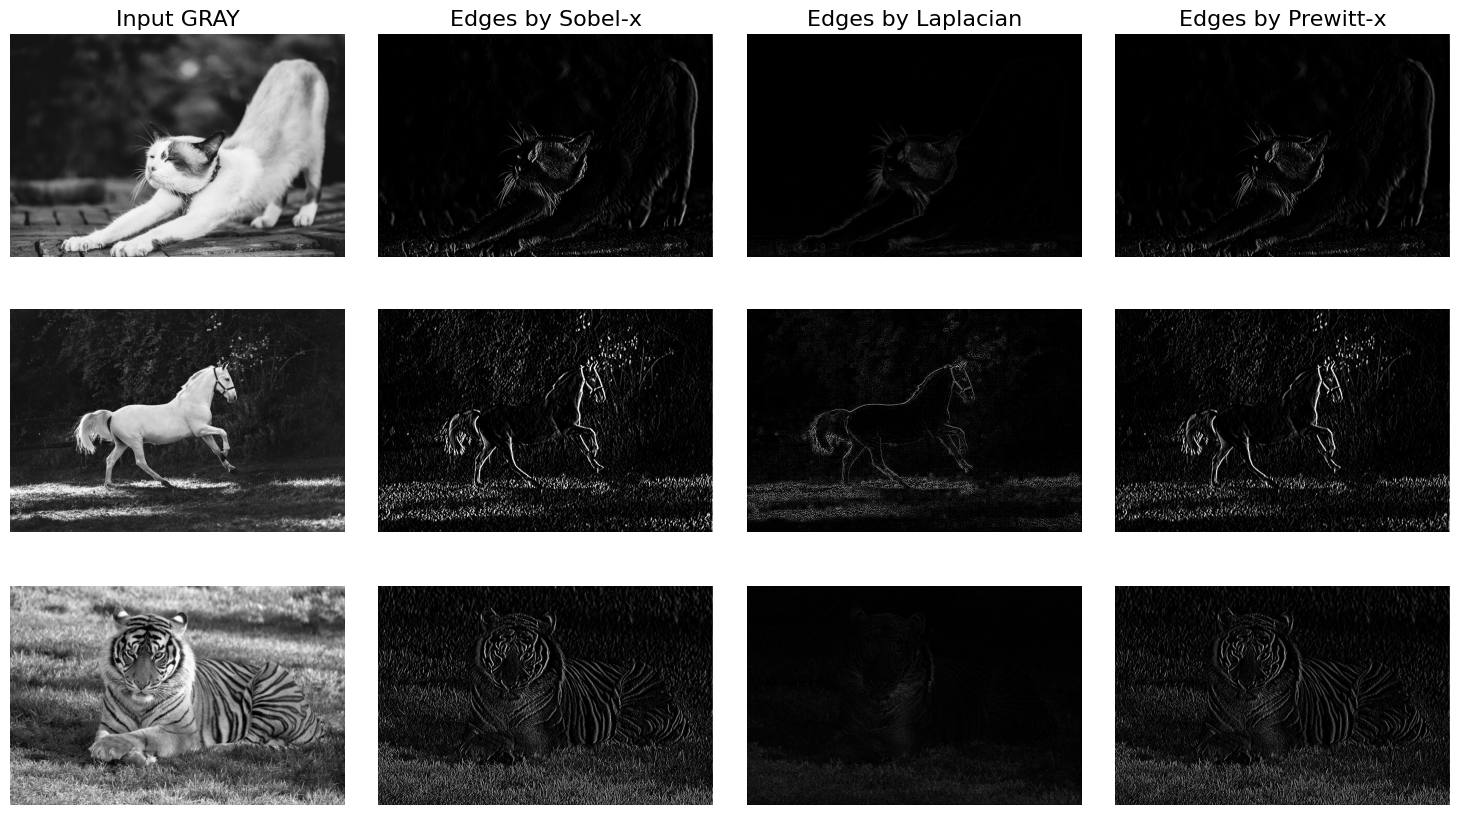

In [18]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (18.0, 10.0)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=3, ncols=4)
# ax is a (3, 4) Numpy array and to access specific subplot we call it by ax[0, 0]


# Adjusting first column with GRAY images
ax[0, 0].imshow(image1_GRAY, cmap=plt.get_cmap('gray'))
ax[1, 0].imshow(image2_GRAY, cmap=plt.get_cmap('gray'))
ax[2, 0].imshow(image3_GRAY, cmap=plt.get_cmap('gray'))


# Adjusting second column with edges by filter 1: Sobel-x
ax[0, 1].imshow(output_image1_GRAY[0], cmap=plt.get_cmap('gray'))
ax[1, 1].imshow(output_image2_GRAY[0], cmap=plt.get_cmap('gray'))
ax[2, 1].imshow(output_image3_GRAY[0], cmap=plt.get_cmap('gray'))


# Adjusting third column with edges by filter 2: Laplacian
ax[0, 2].imshow(output_image1_GRAY[1], cmap=plt.get_cmap('gray'))
ax[1, 2].imshow(output_image2_GRAY[1], cmap=plt.get_cmap('gray'))
ax[2, 2].imshow(output_image3_GRAY[1], cmap=plt.get_cmap('gray'))


# Adjusting fourth column with edges by filter 3: Prewitt-x
ax[0, 3].imshow(output_image1_GRAY[2], cmap=plt.get_cmap('gray'))
ax[1, 3].imshow(output_image2_GRAY[2], cmap=plt.get_cmap('gray'))
ax[2, 3].imshow(output_image3_GRAY[2], cmap=plt.get_cmap('gray'))


# Giving names to columns
ax[0, 0].set_title('Input GRAY', fontsize=16)
ax[0, 1].set_title('Edges by Sobel-x', fontsize=16)
ax[0, 2].set_title('Edges by Laplacian', fontsize=16)
ax[0, 3].set_title('Edges by Prewitt-x', fontsize=16)


# Hiding axes to all subplots
for i in range(3):
    for j in range(4):
        ax[i, j].axis('off')


# Adjusting distance between subplots
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.1)


# Saving the plot
# (!) On Windows, the path might look like following:
# r'images\plot_convolution.png'
# or:
# 'images\\plot_convolution.png'
figure.savefig('images/plot_convolution.png')


# Showing the plot
plt.show()


### Some comments
  
<span style="font-size:13pt">**np.clip(array, min, max)**</span>  
<span style="font-size:13pt">*Clip the values inside array by a given interval (between min and max)*</span>  
<span style="font-size:13pt">*Values outside the interval are clipped to the interval edges*</span>    

<span style="font-size:13pt">More details and examples are here:</span>  
<span style="font-size:13pt">https://numpy.org/devdocs/reference/generated/numpy.clip.html  </span>

### Sobel filter to detect horizontal changes on image

In [19]:
filter_4 = np.array([[1, 2, 1],  
                     [0, 0, 0],  
                     [-1, -2, -1]])

filter_4

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

### Prewitt filter to detect horizontal changes on image

In [20]:
filter_5 = np.array([[1, 1, 1],  
                     [0, 0, 0],  
                     [-1, -1, -1]])

filter_5

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

### Gaussian blur filter

In [21]:
filter_6 = (1 / 16) * np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]])

filter_6

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])